In [5]:
!pip install playsound
!pip install gtts

In [6]:
#Importing the required libraries
import pandas as pd
import numpy as np
import random
import playsound
import re
import gtts
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from google.colab import files
uploaded = files.upload()


Saving ratings.csv to ratings.csv


In [11]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [12]:
from google.colab import files
uploaded = files.upload()

Saving links.csv to links.csv


In [13]:
from google.colab import files
uploaded = files.upload()

Saving tags.csv to tags.csv


In [15]:
#importing the dataset
movies_dataset=pd.read_csv('movies.csv')
ratings_dataset=pd.read_csv('ratings.csv')

In [16]:
#Checking the head and info of our dataset
movies_dataset.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
ratings_dataset.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [18]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [19]:
ratings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<Axes: xlabel='rating', ylabel='Density'>

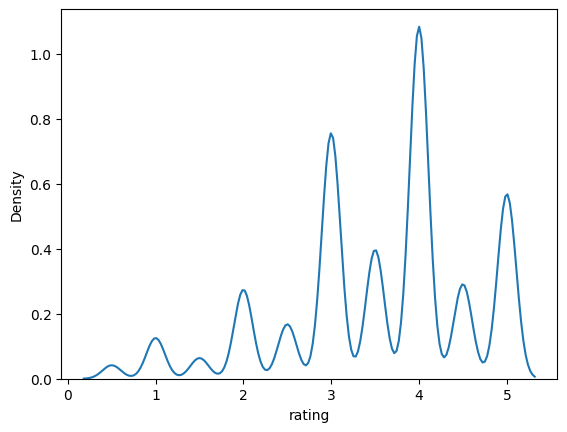

In [20]:
sns.kdeplot(ratings_dataset['rating'])

In [21]:
#Converting the format of Genre column to a list and then appending to the new list
Genre=[]
Genres={}
for num in range(0,len(movies_dataset)):
    key=movies_dataset.iloc[num]['title']
    value=movies_dataset.iloc[num]['genres'].split('|')
    Genres[key]=value
    Genre.append(value)

In [22]:
#Making a new column in our original Dataset
movies_dataset['new'] =Genre

In [23]:
#Getting the year from the movie column
p = re.compile(r"(?:\((\d{4})\))?\s*$")
years=[]
for movies in movies_dataset['title']:
     m = p.search(movies)
     year = m.group(1)
     years.append(year)
movies_dataset['year']=years

In [24]:
#Deleting the year from the movies title column
movies_name=[]
raw=[]
for movies in movies_dataset['title']:
     m = p.search(movies)
     year = m.group(0)
     new=re.split(year,movies)
     raw.append(new)
for i in range(len(raw)):
    movies_name.append(raw[i][0][:-2])

In [25]:
#Making a new column in the dataset having the movie name only in it
movies_dataset['movie_name']=movies_name

In [26]:
#Converting the datatype of new column from list to string as required by the function
movies_dataset['new']=movies_dataset['new'].apply(' '.join)

In [27]:
 #Applying Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfid=TfidfVectorizer(stop_words='english')
#matrix after applying the tfidf
matrix=tfid.fit_transform(movies_dataset['new'])


In [29]:
#Compute the cosine similarity of every genre
from sklearn.metrics.pairwise import cosine_similarity


In [30]:
cosine_sim=cosine_similarity(matrix,matrix)


In [31]:
#Making a new series which have two columns in it
#Movie name and movie id
movies_dataset = movies_dataset.reset_index()
titles = movies_dataset['movie_name']
indices = pd.Series(movies_dataset.index, index=movies_dataset['movie_name'])

In [32]:
#Function to make recommendation to the user
def recommendataion(movie):
    result=[]
    #Getting the id of the movie for which the user want recommendation
    ind=indices[movie]
    #Getting all the similar cosine score for that movie
    sim_scores=list(enumerate(cosine_sim[ind]))
    #Sorting the list obtained
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    #Getting all the id of the movies that are related to the movie Entered by the user
    movie_id=[i[0] for i in sim_scores]
    print('The Movie You Should Watched Next Are --')
    print('ID ,   Name ,  Average Ratings , Year ')
    #Varible to print only top 10 movies
    count=0
    for id in range(0,len(movie_id)):
      #to ensure that the movie entered by the user is doesnot come in his/her recommendation
        if(ind != movie_id[id]):
            ratings=ratings_dataset[ratings_dataset['movieId']==movie_id[id]]['rating']
            avg_ratings=round(np.mean(ratings),2)
            #To print only thoese movies which have an average ratings that is more than 3.5
            if(avg_ratings >3.5):
                count+=1
                print(f'{movie_id[id]} , {titles[movie_id[id]]} ,{avg_ratings}')
                result.append([titles[movie_id[id]],str(avg_ratings)])
            if(count >=10):
                    break

    print('Wait!! i am telling your recommendation')
    return result

In [33]:
#Converting the text to speech using google text to speech api
def text_to_speech():
    file = open('dd.txt','w')
    file.writelines(f'hello User \n')
    file.writelines('The Movie You Should Watched Next and their corresponding ratings are \n')
    for res in result:
        res=' '.join(res)
        file.write(res+'\n')

    file.close()
    file = open('dd.txt','r')
    data= file.read()
    file.close()


    # Language in which you want to convert
    language = 'en'

    # Passing the text and language to the engine,
    # here we have marked slow=False. Which tells
    # the module that the converted audio should
    # have a high speed
    myobj = gtts.gTTS(text=data, lang=language, slow=False)

    # Saving the converted audio in a mp3 file named
    i=random.randint(1,100)
    file='new'+str(i)+'.mp3'
    myobj.save(file)

    #Playing the converted file
    playsound(file)

In [39]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 59.5 MB/s eta 0:00:00


In [46]:
#Making the method to get text from speech
import speech_recognition as sr

In [43]:
def speech_to_text():

    sample_rate = 48000

    chunk_size = 2048
    #Initialize the recognizer
    r = sr.Recognizer()

    with sr.Microphone(sample_rate = sample_rate,
                            chunk_size = chunk_size) as source:
        #wait for a second to let the recognizer adjust the
        #energy threshold based on the surrounding noise level
        r.adjust_for_ambient_noise(source)
        print ("Speak the name of the movie ")
        #listens for the user's input
        audio = r.listen(source)

        try:
            text = r.recognize_google(audio)
            print(text)

        #error occurs when google could not understand what was said

        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand audio")

        except sr.RequestError as e:
            print("Could not request results from Google  Speech Recognition service; {0}".format(e))

        return text

In [62]:
!pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2065021 sha256=8b80d6f33d5a60aed5e1cfc57889b4bbf79d94c3f82fcf413072d50595c484b5
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio


In [65]:
#Getting the output
text=speech_to_text()
result=recommendataion(text)
text_to_speech()

AttributeError: ignored